# Creating Subarray Images with SPyFFI
This notebook shows how to use `SPyFFI` to extract ingredient high-resolution PSFs at a given location. It requires having access to the high-resolution PSF python dictionaries in your `$SPYFFIDATA`.

In [1]:
# this sets where to look for inputs and store outputs 
# (it will default to `~/.tess/spyffi` if the $SPYFFIDATA environment variable isn't set)
import os
os.environ["SPYFFIDATA"] = '/Users/zkbt/Cosmos/Data/TESS/FFIs'
# this will need to have a "inputs/" directory inside it
# if not there, it will download it automatically

# this makes sure that updates are actually printed to the terminal (instead of just to a log)
import logging
logging.basicConfig(level="INFO")

In [14]:
# this loads a default observation definition, which is a dictionary of dictionaries
from SPyFFI.Observation import Observation, default
inputs = default

# give a label to this observation (that goes into the directory name)
inputs['camera']['label'] = 'showingpsfs'
# how big of a subarray in pixels (centered on the FOV); None will give four normal CCDs
inputs['camera']['subarray'] = None
# should we change the focus throughout the orbit? 
inputs['camera']['variablefocus'] = False

# should we skip injecting cosmic rays? (False = *do* inject cosmics)
inputs['expose']['skipcosmics'] = False
# let's write the cosmic ray images out as separate files
inputs['expose']['writecosmics'] = True

# what's the catalog ("testpattern" or "UCAC4")
inputs['catalog']['name'] = 'testpattern'
# should we randomize the magnitudes of the stars
inputs['catalog']['testpatternkw']['randomizemagnitudes'] = True
# what range of magnitudes should the stars span?
inputs['catalog']['testpatternkw']['magnitudes'] = [6,16]

# how many of each exposure duration should we make?
inputs['observation']['cadencestodo'] = {1800:1}

In [15]:
# define the camera, the geometry of the field, and link everything together
o = Observation(inputs)

INFO:SPyFFI.Observation:  creating a new observation, with the following inputs:
INFO:SPyFFI.Observation:      inputs[expose] = 
INFO:SPyFFI.Observation:                 magnitudethreshold:999
INFO:SPyFFI.Observation:                             jitter:True
INFO:SPyFFI.Observation:                     correctcosmics:True
INFO:SPyFFI.Observation:                              smear:False
INFO:SPyFFI.Observation:                   cosmicsdiffusion:True
INFO:SPyFFI.Observation:                           compress:{120: True, 1800: False, 2: True, 20: True}
INFO:SPyFFI.Observation:                     cosmicsversion:fancy
INFO:SPyFFI.Observation:                       writecosmics:True
INFO:SPyFFI.Observation:                     writesimulated:True
INFO:SPyFFI.Observation:                        skipcosmics:False
INFO:SPyFFI.Observation:                     writenoiseless:False
INFO:SPyFFI.Observation:                            display:False
INFO:SPyFFI.Observation:      inputs[camera] = 


In [16]:
# create a position in the field (measured in pixels from field center)
position = o.camera.cartographer.point(436, 1214, type='focalxy')

In [9]:
# pull out a high resolution PSF image (x + y grids, and the PSF) at that position
x = o.camera.psf.dx_subpixels
y = o.camera.psf.dy_subpixels
print("Hang on a sec, and please make sure you've got lots of memory. Loading the PSF library might take a minute.")
psf = o.camera.psf.highResolutionPSF(position, stellartemp=3000)

INFO:SPyFFI.PSF:generating high-resolution PSF for focus=0um, T=3000K, position=focalplane (x, y) = (436,1214)


Hang on a sec, and please make sure you've got lots of memory. Loading the PSF library might take a minute.


INFO:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


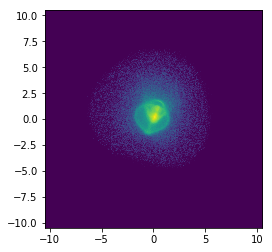

In [10]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
plt.imshow(np.log(psf+0.0000001), extent=[np.min(x), np.max(x), np.min(y), np.max(y)], origin='lower', interpolation='nearest');

Happy PSF'ing!